<div align = "center">
<h1>EE 325 Digital Signal Processing</h1>
<h2>Laboratory Assignment 1</h2>
<h3>E/19/445</h3>
</div>

In [1]:
import numpy as np
import scipy
from scipy import signal
import scipy.fft as fft
from scipy.fft import fftfreq, fftshift
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks, chirp, periodogram

# Question 1

In [2]:
x, y, a, b, c = 1, 9, 4, 4, 5

f1 = 10 + a
f2 = 30 + b
f3 = 70 + c

t = np.arange(0,101,0.001)

v_t = np.random.normal(loc=0, scale=1, size=len(t))

# N = np.size(t,axis=0)
# v_t = (0.5*(2*np.random.rand(N)-1)) 

signal_1 = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t) + v_t

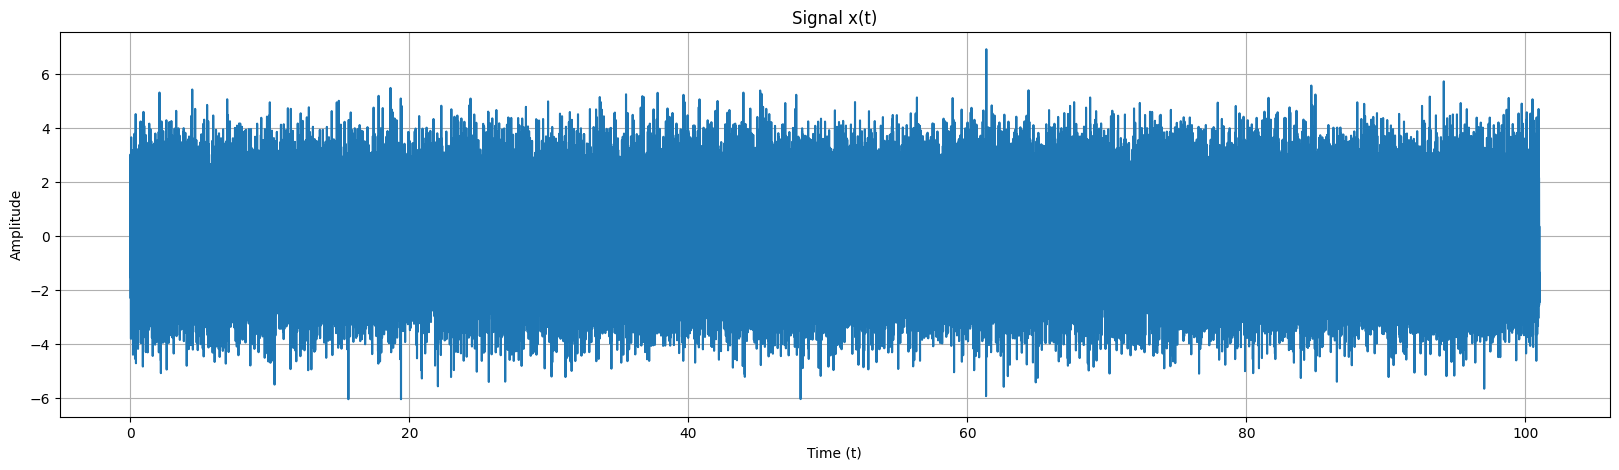

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(t, signal_1)
plt.title('Signal x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

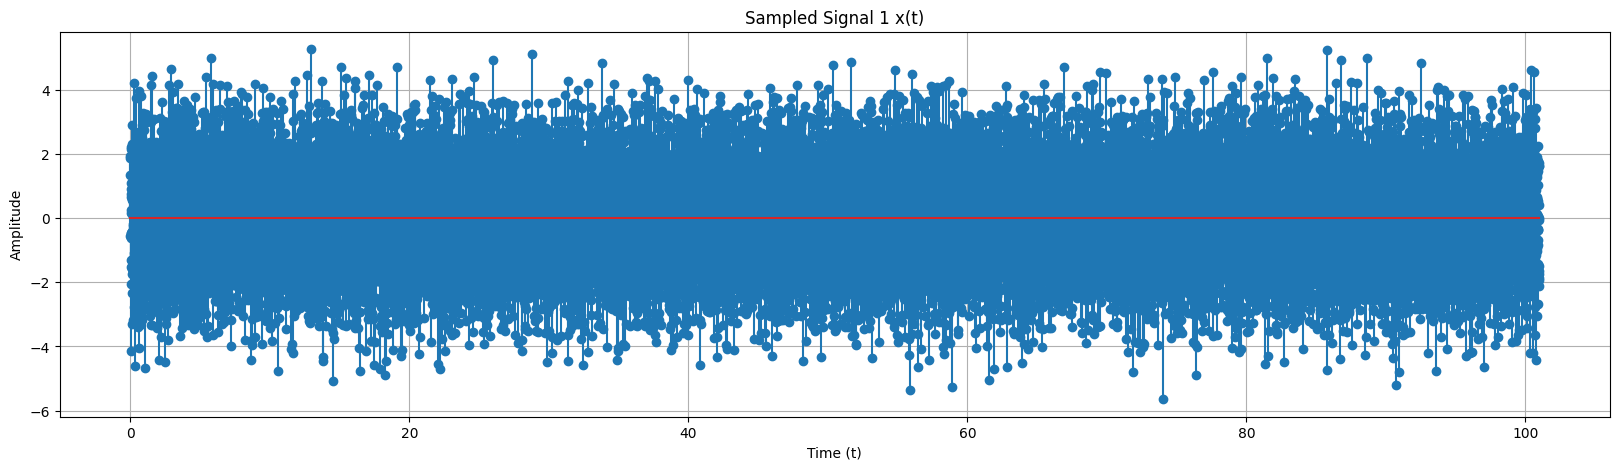

In [4]:
Fs = 200
t_sampled = np.arange(0,101,1/Fs)

v_t_sampled = np.random.normal(loc=0, scale=1, size=len(t_sampled))

signal_1_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled) + np.sin(2 * np.pi * f3 * t_sampled) + v_t_sampled

plt.figure(figsize=(20, 5))
plt.stem(t_sampled, signal_1_sampled)
plt.title('Sampled Signal 1 x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

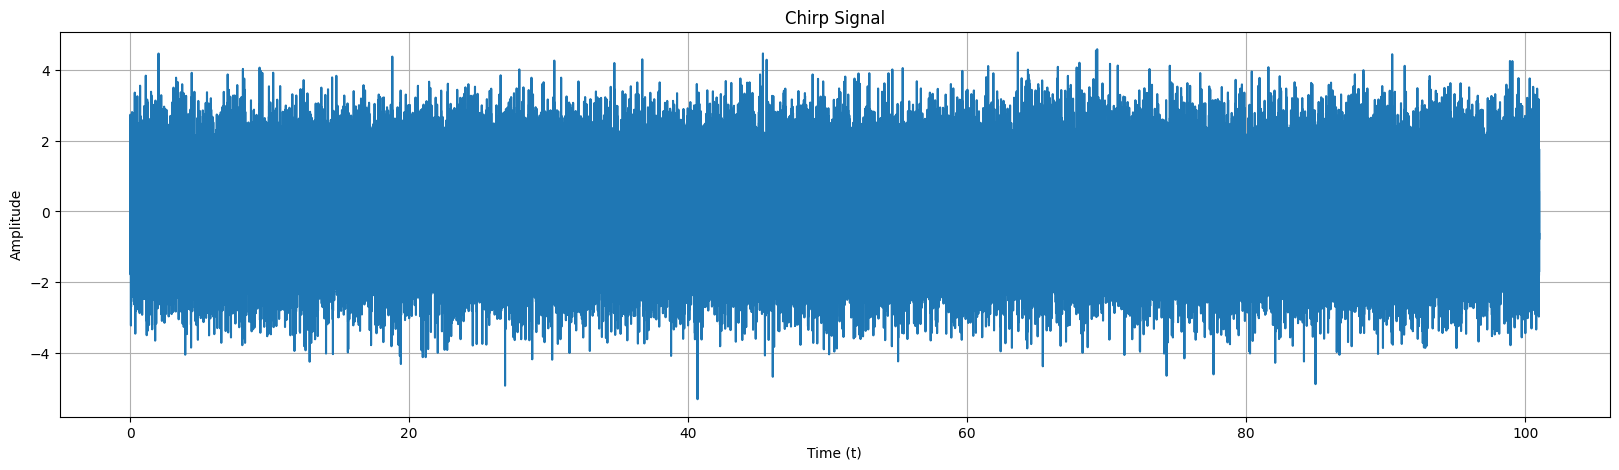

In [5]:
chirp_signal = np.sin(20*np.pi*t + 2*np.pi*(t**2/150)) + v_t

plt.figure(figsize=(20, 5))
plt.plot(t, chirp_signal)
plt.title('Chirp Signal')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

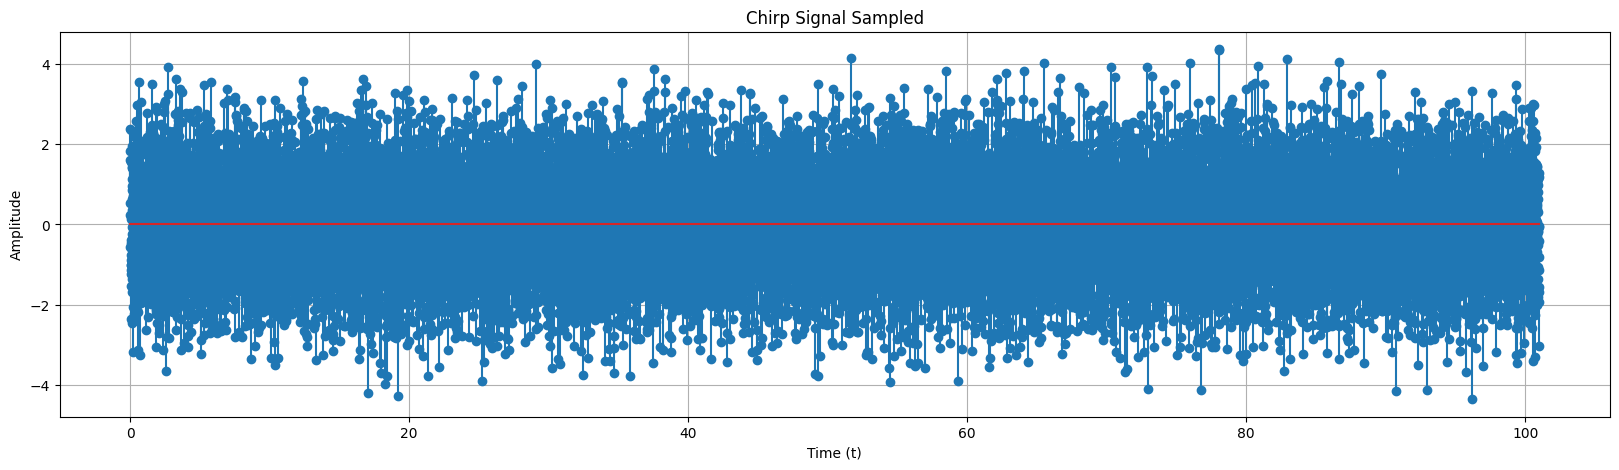

In [6]:
chirp_signal_sampled = np.sin(20*np.pi*t_sampled + 2*np.pi*(t_sampled**2/150)) + v_t_sampled

plt.figure(figsize=(20, 5))
plt.stem(t_sampled, chirp_signal_sampled)
plt.title('Chirp Signal Sampled')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Question 2

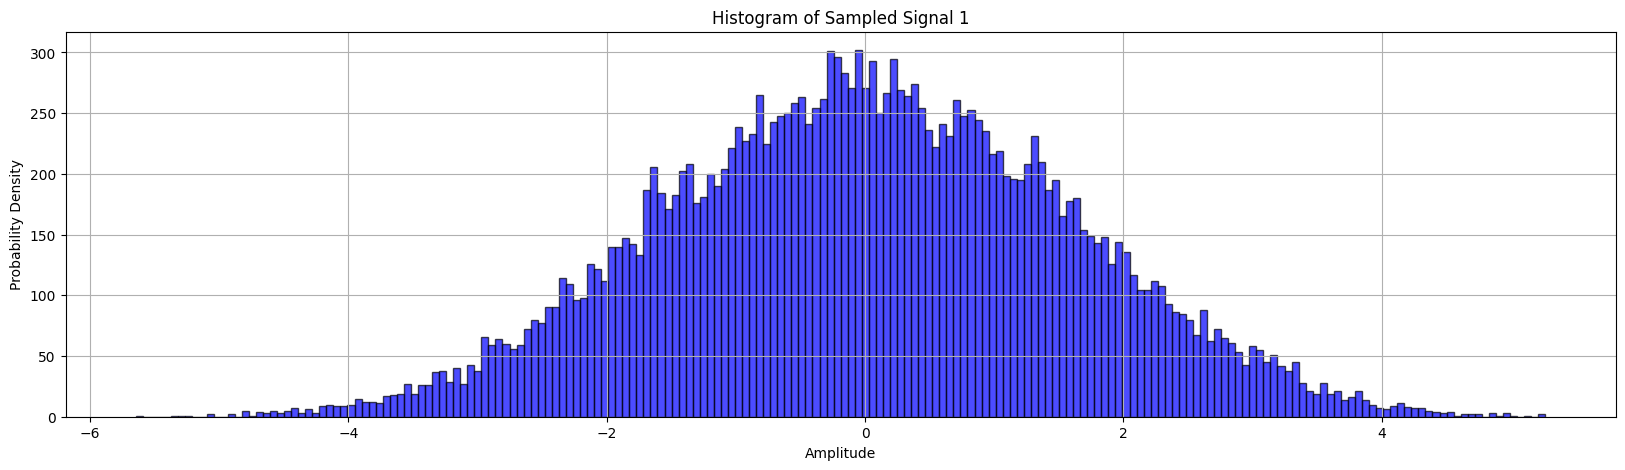

In [7]:
number_of_samples = Fs

plt.figure(figsize=(20, 5))
plt.hist(signal_1_sampled, bins = number_of_samples, color = 'blue', edgecolor = 'black', alpha=0.7) 
plt.title('Histogram of Sampled Signal 1')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

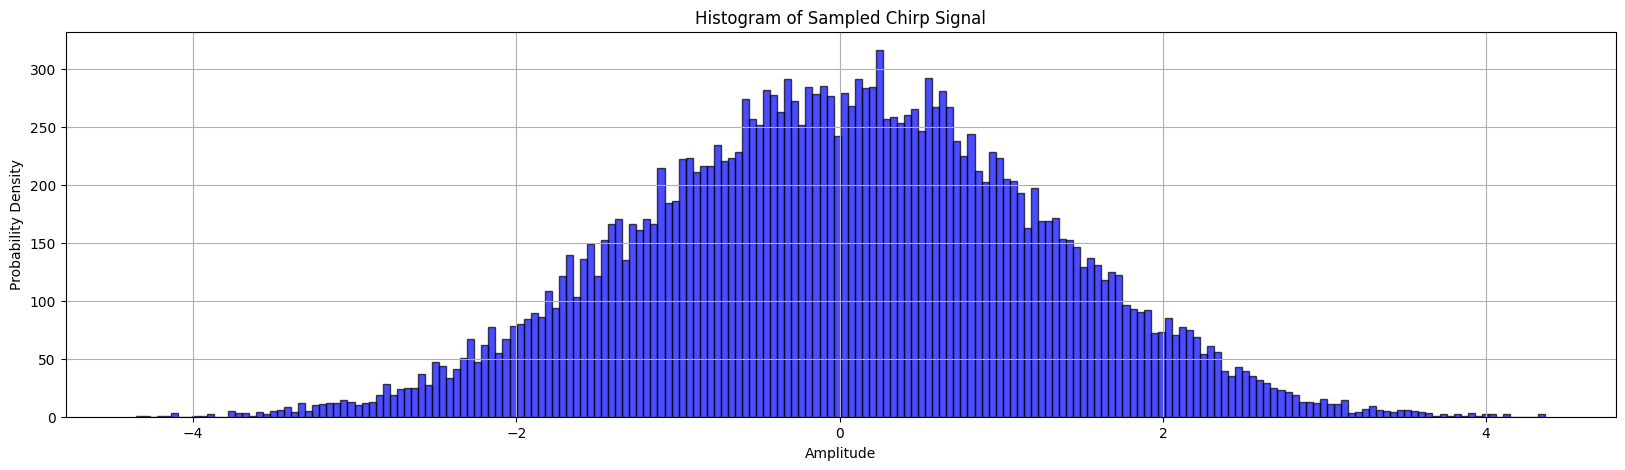

In [8]:
plt.figure(figsize=(20, 5))
plt.hist(chirp_signal_sampled, bins = number_of_samples, color = 'blue', edgecolor = 'black', alpha=0.7)
plt.title('Histogram of Sampled Chirp Signal')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# Question 3

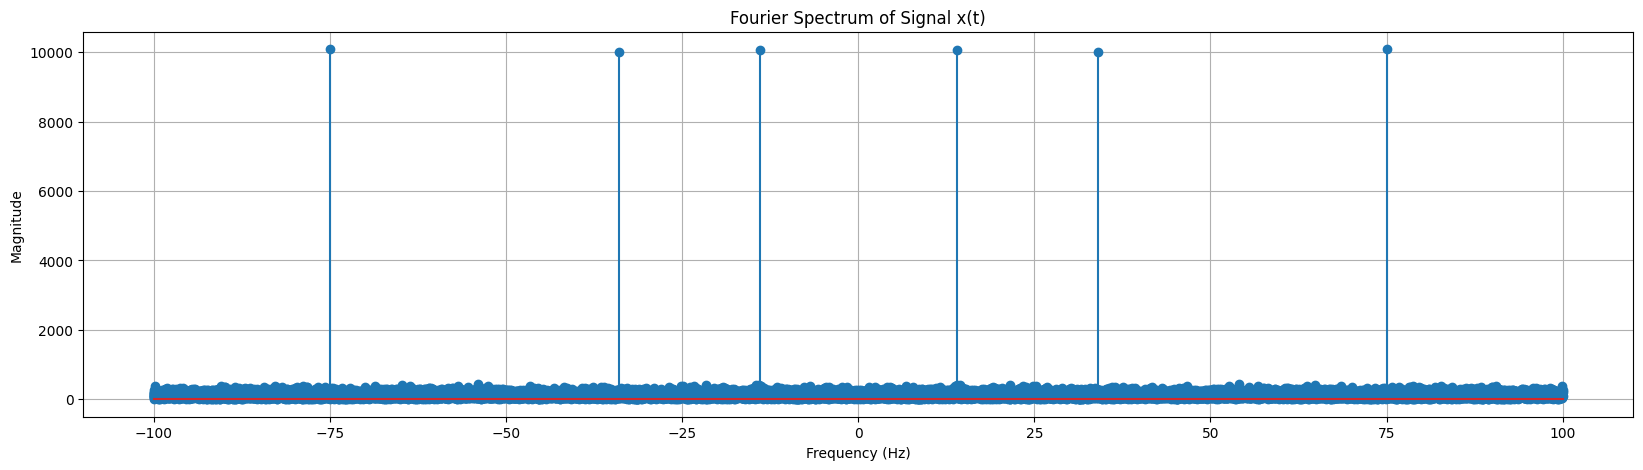

In [9]:
DFT_signal_1 = fft.fft(signal_1_sampled)
freq_signal_1 = fft.fftfreq(len(signal_1_sampled), 1/Fs)

plt.figure(figsize=(20, 5))
plt.stem(freq_signal_1, np.abs(DFT_signal_1))
plt.title('Fourier Spectrum of Signal x(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

### Estimated Frequencies for signal 1
$\begin{align}
\pm 14, \: \: \pm 34, \: \: \pm 75
\end{align}$

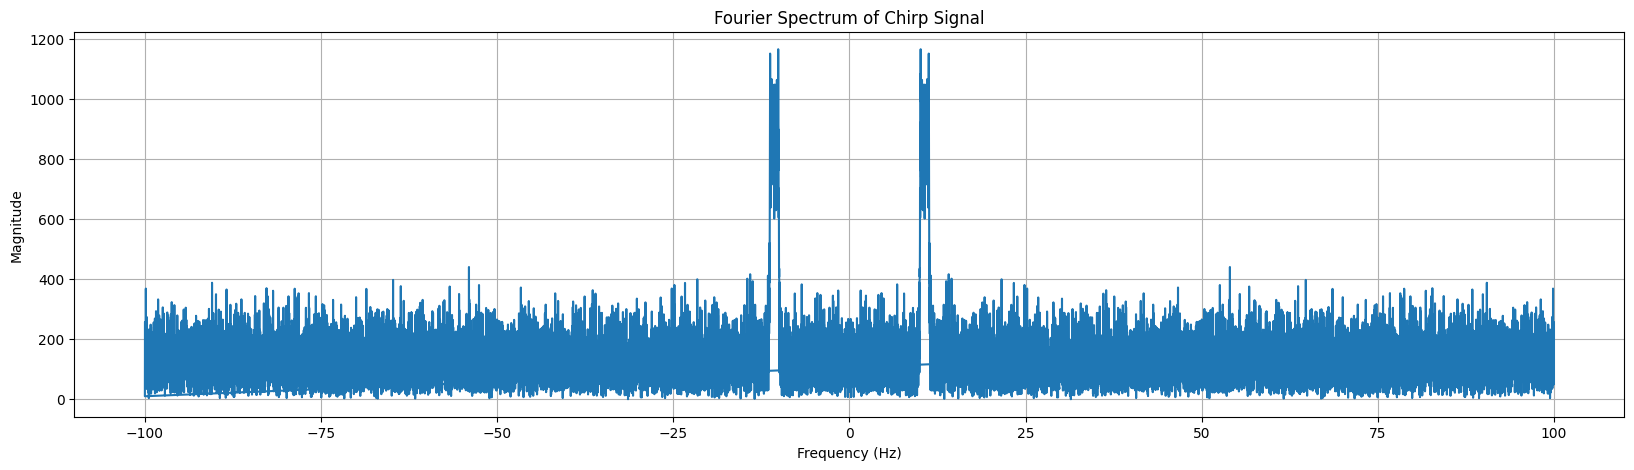

In [10]:
DFT_chirp_signal = fft.fft(chirp_signal_sampled)
freq_chirp_signal = fft.fftfreq(len(chirp_signal_sampled), 1/Fs)

plt.figure(figsize=(20, 5))
plt.plot(freq_chirp_signal, np.abs(DFT_chirp_signal))
plt.title('Fourier Spectrum of Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Question 4

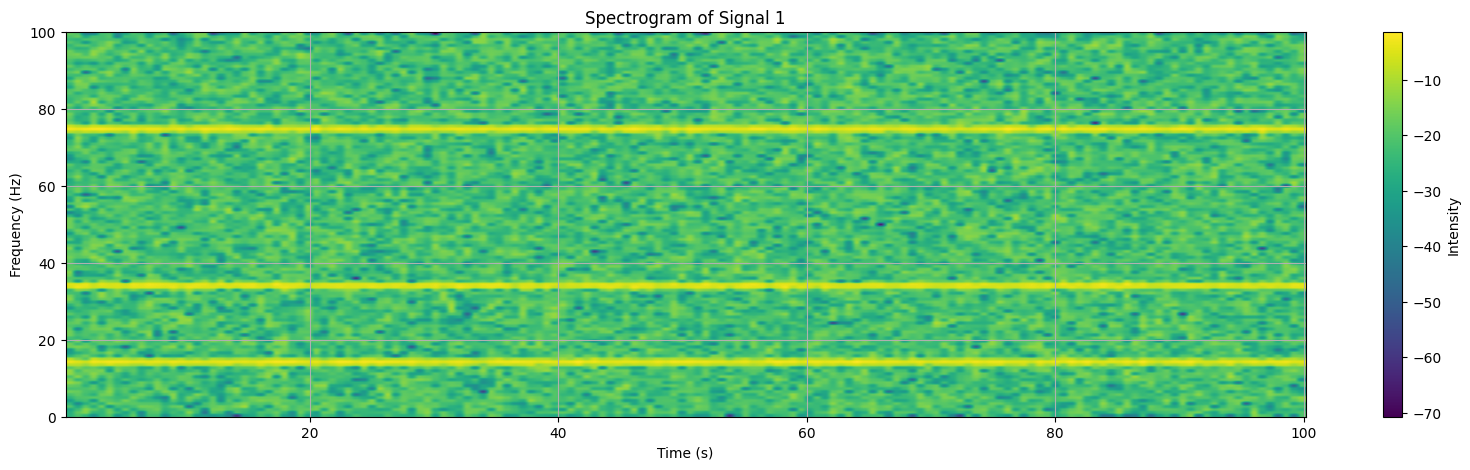

In [11]:
plt.figure(figsize=(20, 5))
plt.specgram(signal_1_sampled, Fs = Fs)
plt.title('Spectrogram of Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label = "Intensity")
plt.grid(True)
plt.show()

### Estimated Frequencies for signal 1
$\begin{align}
\pm 14, \: \: \pm 34, \: \: \pm 75
\end{align}$

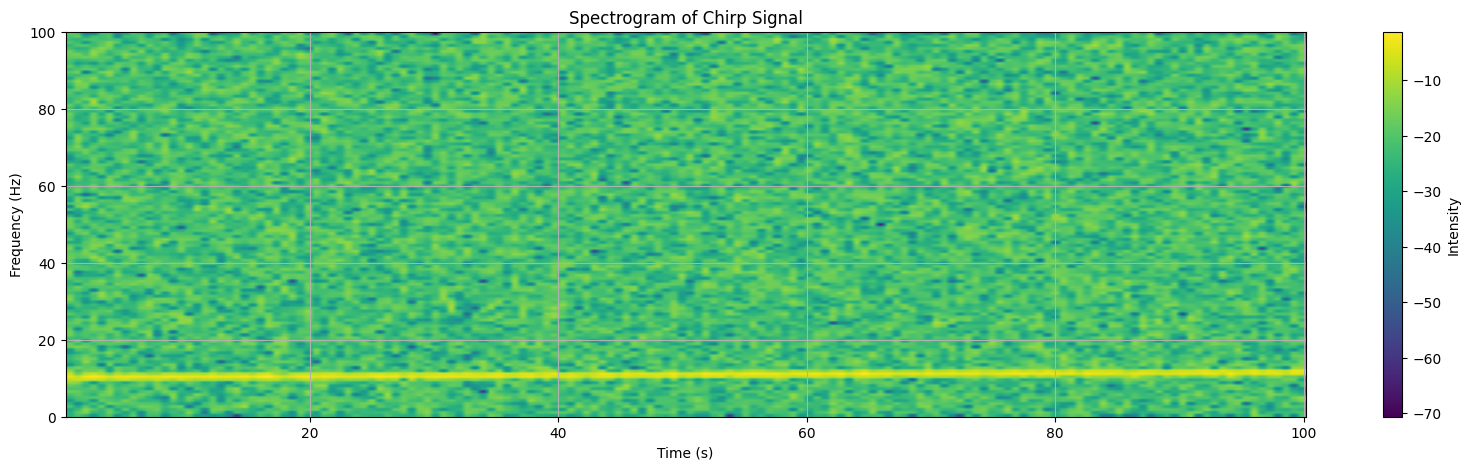

In [12]:
plt.figure(figsize=(20, 5))
plt.specgram(chirp_signal_sampled, Fs = Fs)
plt.title('Spectrogram of Chirp Signal')
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)')
plt.colorbar(label = "Intensity")
plt.grid(True)
plt.show()

# Question 5

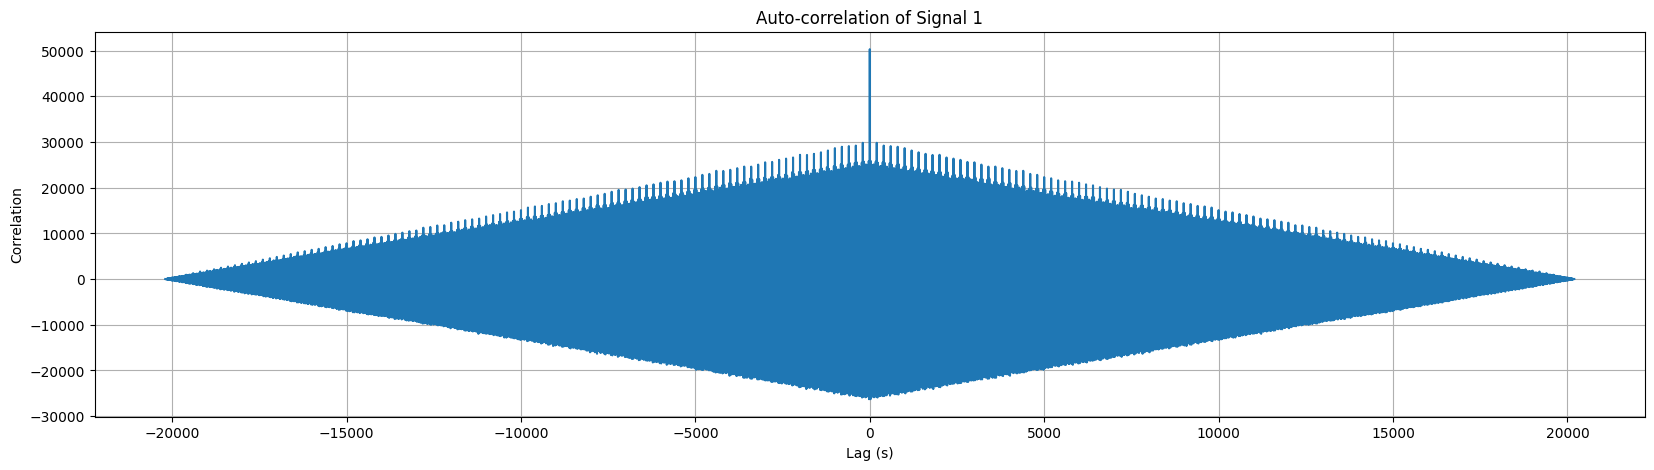

In [13]:
auto_correlation_signal_1  = correlate(signal_1_sampled, signal_1_sampled, mode = "full")

lags = np.arange(-len(signal_1_sampled) + 1, len(signal_1_sampled))

plt.figure(figsize=(20, 5))
plt.plot(lags, auto_correlation_signal_1)
plt.title('Auto-correlation of Signal 1')
plt.xlabel('Lag (s)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

In [14]:
filtered_auto_correlation_signal_1 = auto_correlation_signal_1[len(auto_correlation_signal_1)//2:]
peaks, _ = find_peaks(filtered_auto_correlation_signal_1, height=0)

fundamental_period = (peaks[1] - peaks[0]) / 200  # Convert lag to time (seconds)

print("Fundamental period of Signal 1:", fundamental_period, "seconds")

Fundamental period of Signal 1: 0.03 seconds


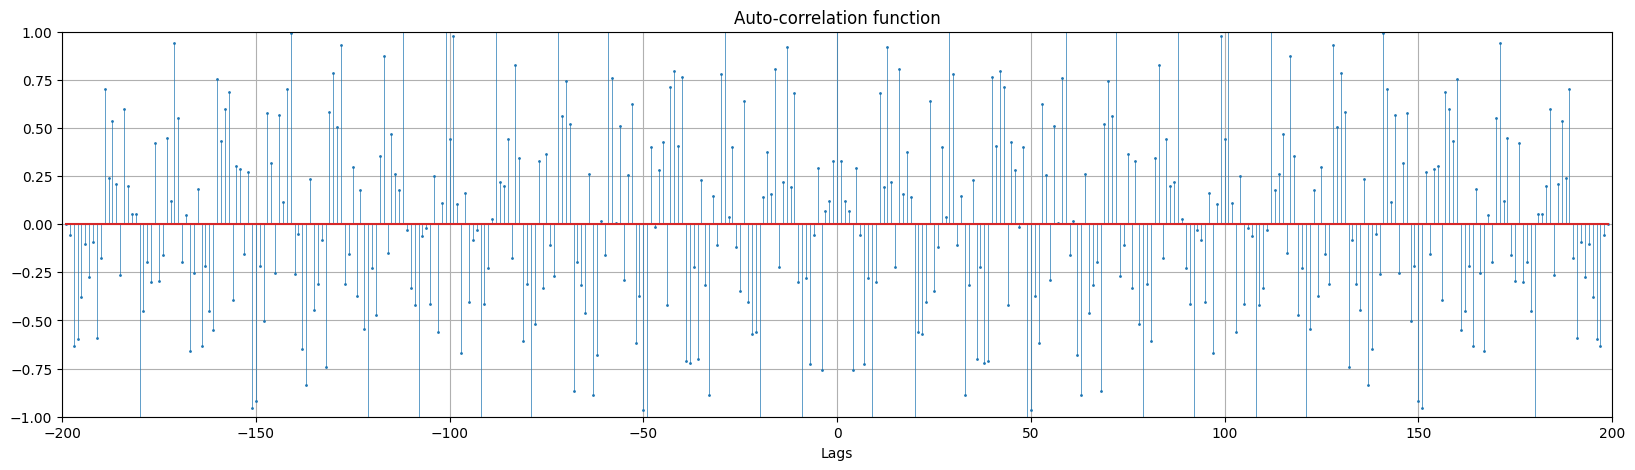

In [15]:
from scipy.fft import fft, fftfreq, fftshift

# Time settings
fs = 200 # Sampling frequency
dt = 1/fs # Sampling time
t_end = 1 # Duration in seconds

t = np.arange(0, t_end, dt) # Time interval [0,t_end-dt]
N = np.size(t, axis=0) # Signal length

noise = (0.5*(2*np.random.rand(N)-1)) # Normally-distributed random noise in the range (-0.1,+0.1)

# Example signal
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t) + noise
R = np.zeros((1, N)) ; # Initialize

for i in range(N-1):
    R[0,i] = (1/(N-i))*sum(x[0:(N-i-1)]*x[(i):(N-1)])#endfor

# Construct the autocorrelation function
x_axis = np.arange(1-N, N-1+1, 1)
r_xx = np.concatenate((np.fliplr(R[:,1:]), R), axis=1)
r_xx = np.squeeze(r_xx)

# Plot the approximate auto-correlation function of the signal
fig = plt.figure(figsize=(20, 5))
markerline, stemline, baseline, = plt.stem(x_axis, r_xx)
plt.setp(stemline, linewidth = 0.5)
plt.setp(markerline, markersize = 1)
plt.xlim([-fs,+fs])
plt.ylim([-1,+1])
plt.xlabel('Lags')
plt.title('Auto-correlation function')
plt.grid()
plt.show()


# Question 6

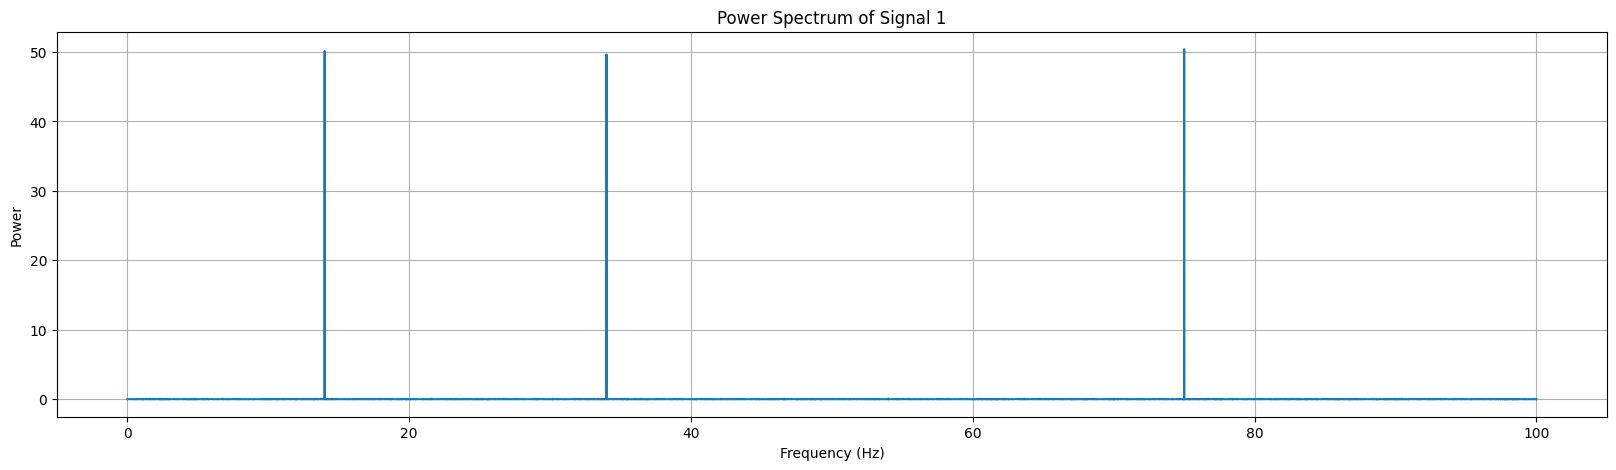

In [16]:
frequencies_1, power_spectrum_1 = periodogram(signal_1_sampled, fs=Fs)

plt.figure(figsize=(20, 5))
plt.plot(frequencies_1, power_spectrum_1)
plt.title('Power Spectrum of Signal 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

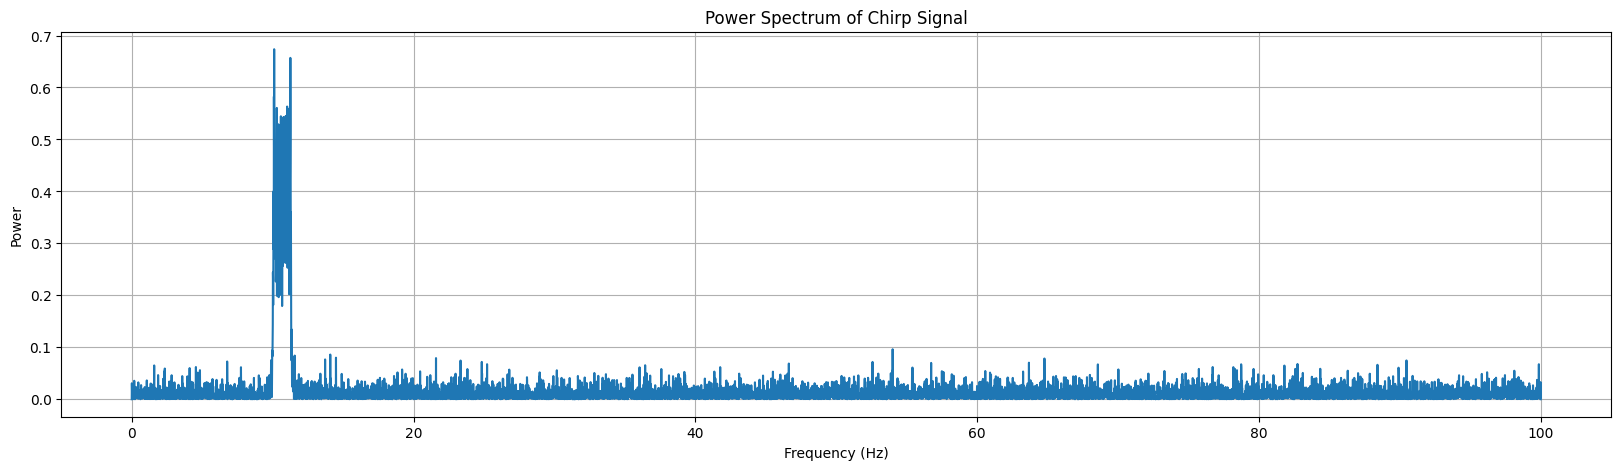

In [17]:
frequencies_2, power_spectrum_2 = periodogram(chirp_signal_sampled, fs=Fs)

plt.figure(figsize=(20, 5))
plt.plot(frequencies_2, power_spectrum_2)
plt.title('Power Spectrum of Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

# Question 7

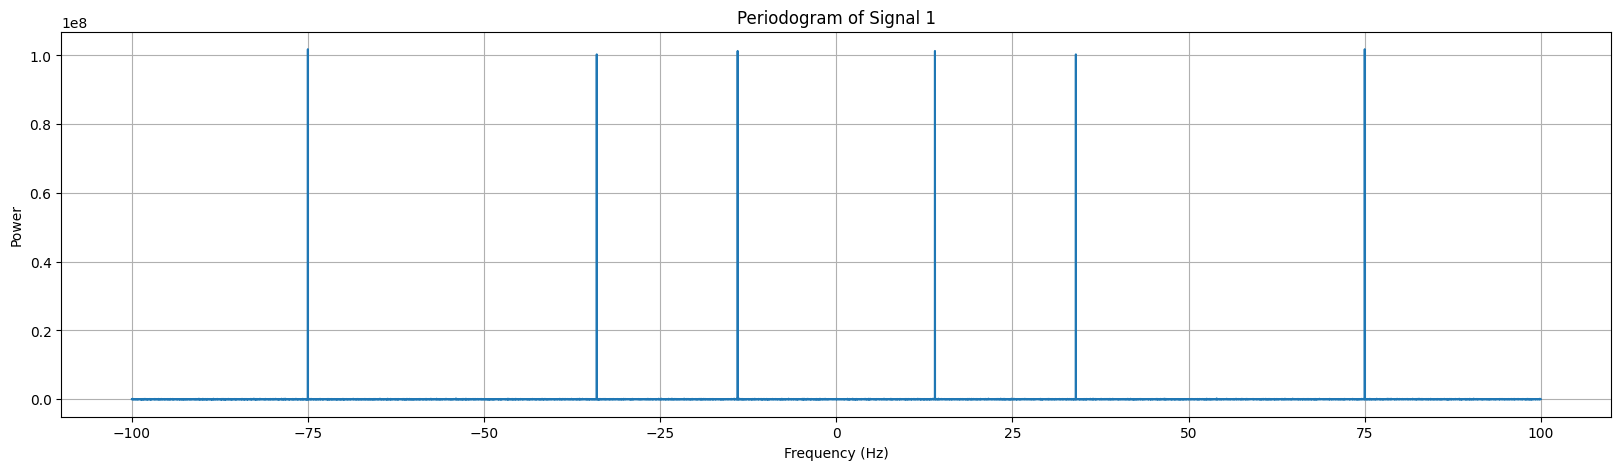

In [18]:
signal_1_XF = fft(signal_1_sampled)
frequencies_1 = fftfreq(len(signal_1_sampled), 1/Fs)

periodogram_1 = np.abs(signal_1_XF)**2

plt.figure(figsize=(20, 5))
plt.plot(frequencies_1, periodogram_1)
plt.title('Periodogram of Signal 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

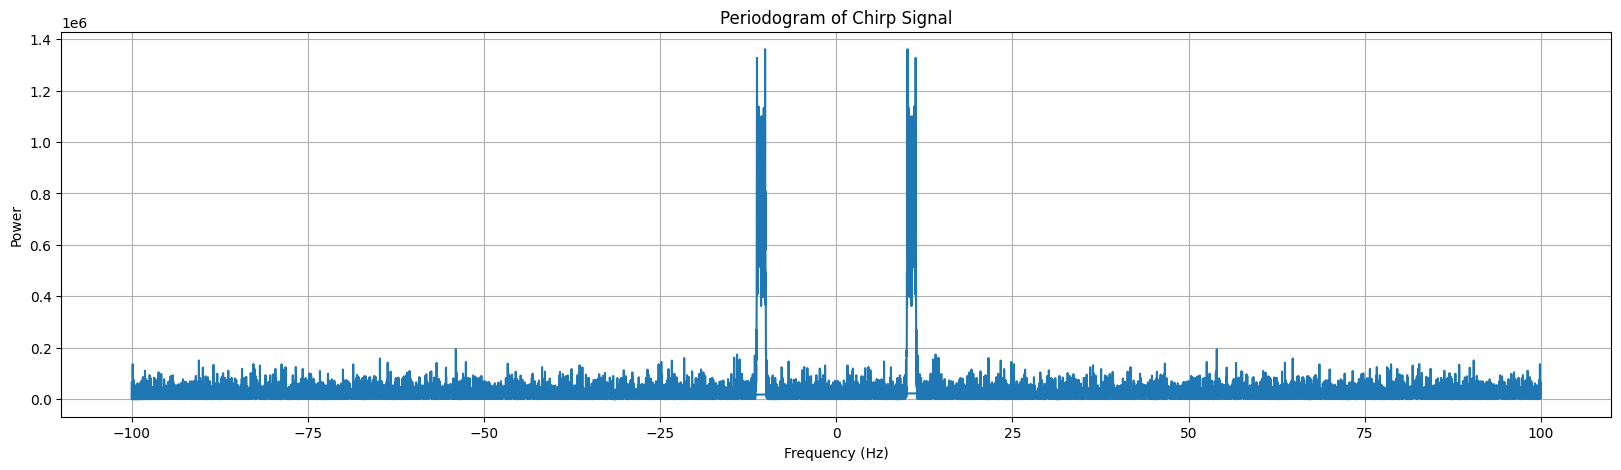

In [20]:
chirp_signal_XF = fft(chirp_signal_sampled)

periodogram_2 = np.abs(chirp_signal_XF)**2

plt.figure(figsize=(20, 5))
plt.plot(frequencies_1, periodogram_2)
plt.title('Periodogram of Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

# Question 8

\begin{align}
4\times 4\;\; Matrix
\end{align}

# Question 9

In [21]:
#compute music psedospectrum

auto_correlation_signal_1 = correlate(signal_1_sampled, signal_1_sampled, mode = "full")
auto_correlation_signal_1 = auto_correlation_signal_1[len(auto_correlation_signal_1)//2:]

eigenvalues, eigenvectors = np.linalg.eig(scipy.linalg.toeplitz(auto_correlation_signal_1))

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

noise_space = eigenvectors[:, 3:]

freq_samples = np.linspace(0, np.pi, 1000)
music_psd = np.zeros(1000)

for idx, freq in enumerate(freq_samples):
    a = np.exp(-1j * freq * np.arange(len(signal_1_sampled)))
    music_psd[idx] = 1/np.linalg.norm(a.dot(noise_space), 2)**2

plt.figure(figsize=(20, 5))
plt.plot(freq_samples, music_psd)
plt.title('MUSIC Pseudospectrum of Signal 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()